In [16]:
import pandas as pd
import numpy as np

df = pd.read_csv('C:/Product_Sale_Forecasting/data/final_featured_dataset.csv')
df.shape

(188340, 26)

In [17]:
df.head()

,ID,Store_id,Date,Holiday,Discount,#Order,Sales,Sales_log,Order_log,Year,...,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5,Region_Code_R2,Region_Code_R3,Region_Code_R4
0,T1000001,1,2018-01-01,1,1,-1.588235,-1.520559,-3.244367,-3.522251,2018.0,...,False,False,False,False,True,False,False,False,False,False
1,T1000002,253,2018-01-01,1,1,-0.088235,0.563754,0.498665,-0.091096,2018.0,...,False,False,True,True,False,False,False,False,False,False
2,T1000003,252,2018-01-01,1,1,-0.617647,-0.130792,-0.137492,-0.754588,2018.0,...,False,True,False,True,False,False,False,False,False,False
3,T1000004,251,2018-01-01,1,1,-1.176471,-0.929239,-1.309263,-1.861084,2018.0,...,True,False,False,False,True,False,False,False,False,False
4,T1000005,250,2018-01-01,1,1,-0.029412,0.276336,0.261009,-0.029882,2018.0,...,True,False,False,False,True,False,False,False,False,True


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 26 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                188340 non-null  object 
 1   Store_id          188340 non-null  int64  
 2   Date              74460 non-null   object 
 3   Holiday           188340 non-null  int64  
 4   Discount          188340 non-null  int64  
 5   #Order            188340 non-null  float64
 6   Sales             188340 non-null  float64
 7   Sales_log         188340 non-null  float64
 8   Order_log         188340 non-null  float64
 9   Year              74460 non-null   float64
 10  Month             74460 non-null   float64
 11  Day               74460 non-null   float64
 12  DayOfWeek         74460 non-null   float64
 13  Is_Weekend        188340 non-null  int64  
 14  Discount_Offered  188340 non-null  int64  
 15  Sales_per_Order   188340 non-null  float64
 16  Store_Type_S2     18

importing libraries


In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [20]:
df.isna().sum()


ID                       0
Store_id                 0
Date                113880
Holiday                  0
Discount                 0
#Order                   0
Sales                    0
Sales_log                0
Order_log                0
Year                113880
Month               113880
Day                 113880
DayOfWeek           113880
Is_Weekend               0
Discount_Offered         0
Sales_per_Order          0
Store_Type_S2            0
Store_Type_S3            0
Store_Type_S4            0
Location_Type_L2         0
Location_Type_L3         0
Location_Type_L4         0
Location_Type_L5         0
Region_Code_R2           0
Region_Code_R3           0
Region_Code_R4           0
dtype: int64

In [21]:
df.fillna(df.mode().iloc[0], inplace=True)
df.isna().sum()

ID                  0
Store_id            0
Date                0
Holiday             0
Discount            0
#Order              0
Sales               0
Sales_log           0
Order_log           0
Year                0
Month               0
Day                 0
DayOfWeek           0
Is_Weekend          0
Discount_Offered    0
Sales_per_Order     0
Store_Type_S2       0
Store_Type_S3       0
Store_Type_S4       0
Location_Type_L2    0
Location_Type_L3    0
Location_Type_L4    0
Location_Type_L5    0
Region_Code_R2      0
Region_Code_R3      0
Region_Code_R4      0
dtype: int64

In [22]:
# 3. Separate Features and Target
X = df.drop(['Sales', 'Sales_log', 'ID', 'Date'], axis=1)
y = df['Sales']

In [23]:
# 4. Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
# 5. Define evaluation function
def evaluate_model(model, X_val, y_val):
    preds = model.predict(X_val)
    mse = mean_squared_error(y_val, preds)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_val, preds)
    r2 = r2_score(y_val, preds)
    print(f"Model: {model.__class__.__name__}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R2 Score: {r2:.4f}")
    print('-'*30)
    return rmse, mae, r2

In [25]:
# 6. Baseline Model - Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
evaluate_model(lr, X_val, y_val)

Model: LinearRegression
RMSE: 0.11
MAE: 0.07
R2 Score: 0.9834
------------------------------


(np.float64(0.11019234216736709), 0.06783126068492609, 0.9834239839405776)

In [26]:
# 7. Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
evaluate_model(rf, X_val, y_val)

Model: RandomForestRegressor
RMSE: 0.01
MAE: 0.00
R2 Score: 0.9999
------------------------------


(np.float64(0.010348960195578695), 0.0013198497683781637, 0.9998537921255236)

In [27]:
# 8. Gradient Boosting Model
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbr.fit(X_train, y_train)
evaluate_model(gbr, X_val, y_val)

Model: GradientBoostingRegressor
RMSE: 0.03
MAE: 0.02
R2 Score: 0.9991
------------------------------


(np.float64(0.025046959819122243), 0.017339037913635693, 0.9991435788804719)

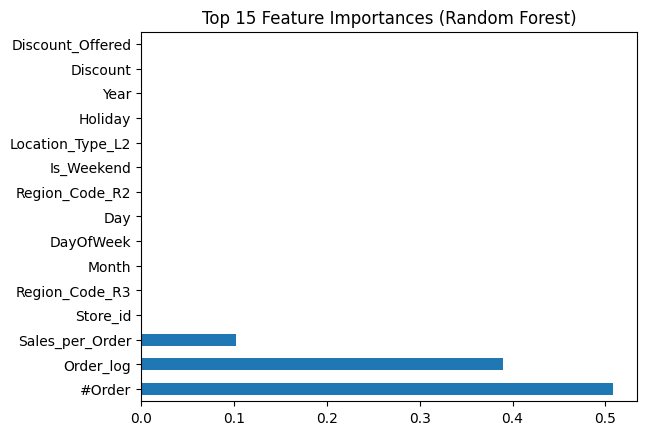

In [28]:
# 9. Feature Importance (from Random Forest)
import matplotlib.pyplot as plt
import seaborn as sns

feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.title('Top 15 Feature Importances (Random Forest)')
plt.show()

# Observations on Model_selection :

* I chose Linear Regression as a base model 
* Random Forest as a tree based model 
* Gradient Boosting as an ensemble machine learning algorithm 

* after feature engineering I missed to check null values in date and new features formed from date.cleared them up here by using mode 

* Linear Regression :
  * RSME : 0.11 
  * MAE : 0.07 
  * R2 Score : 0.98 

* Random Forest :
  * RMSE : 0.01
  * MAE : 0.0 
  * R2 Score : 0.99

* Gradient Boosting :
  * RMSE : 0.03
  * MAE : 0.02
  * R2 Score : 0.9991

* RandomForestRegressor has the lowest RMSE and MAE, and the highest R² (0.9998).
* Its error is almost negligible, and R² is very close to 1, meaning it explains almost all the variance in the data.
* GradientBoosting is good too, but slightly worse than Random Forest.
* Linear Regression is much worse compared to both.

* THIS MADE ME REALISE THAT MAY HAVE MADE A MISTAKE AND CHECKED FOR FEATURE IMPORTANCE GRAPH AND FOUND OUT I USED HIGHLY CORRELATED FEATURE FOR SALES WHICH IS ORDER TO PREDICT MY MODEL 

* SO I'm taking this as a learning oppurtunity and starting a new file for modeling model_training.ipynb
 